In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines 

In [2]:
%config InlineBackend.figure_format = 'retina'

Open file:

In [44]:
data_1 = pd.read_csv('C:/Users/aless/TESI/03.Data_new_solver/Hom_vs_Het_t_regular_4_to_24_saving_distrb/4_task_sw_4_biases_distr.csv')

In [45]:
data_1.head(20)

,mu,cv,u_vector,perf het > hom?,performance_hom,performance1_het_dev
0,6.0,0.25,[6.42752979 6.42752979 6.74946 6.74946 5...,-1,6183.282832,6178.628303
1,6.0,0.25,[5.37429417 5.37429417 5.79303881 5.79303881 7...,-1,6183.282832,6173.259663
2,6.0,0.25,[6.50276025 6.50276025 4.18958431 4.18958431 7...,-1,6183.282832,6170.270150
3,6.0,0.25,[5.72601546 5.72601546 5.14084761 5.14084761 7...,-1,6183.282832,6177.260632
4,6.0,0.25,[8.82304456 8.82304456 7.29534409 7.29534409 4...,-1,6183.282832,6112.249963
5,6.0,0.25,[2.91976491 2.91976491 7.45434777 7.45434777 7...,-1,6183.282832,6140.333069
6,6.0,0.25,[4.29392922 4.29392922 5.82569539 5.82569539 6...,-1,6183.282832,6166.497303
7,6.0,0.25,[5.27462447 5.27462447 8.18690535 8.18690535 4...,-1,6183.282832,6157.239227
8,6.0,0.25,[6.20005839 6.20005839 5.6180399 5.6180399 6...,-1,6183.282832,6180.915892
9,6.0,0.25,[4.04941222 4.04941222 6.52195369 6.52195369 6...,-1,6183.282832,6164.603944


In [46]:
T = 2000
n = 4

In [47]:
Rate = n/T
print(Rate)

0.002


In [48]:
Bias = 1
Na = 4

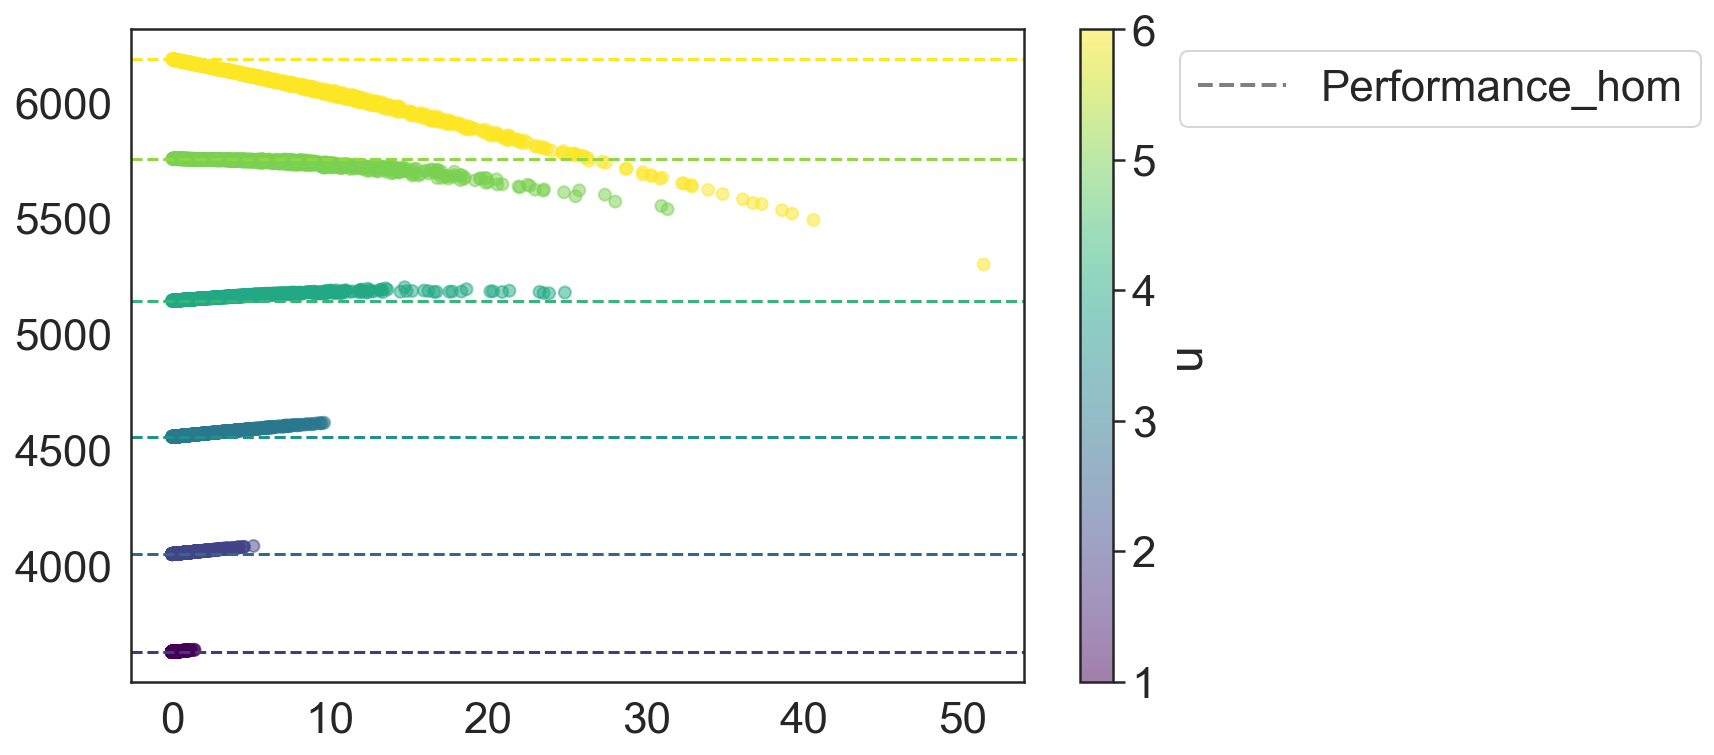

In [49]:
# Extracting relevant columns
u_vector = data_1['u_vector'].apply(lambda x: np.var(np.fromstring(x[1:-1], sep=' ')))
performance1_het_dev = data_1['performance1_het_dev']
color = data_1['mu']

# Plotting
plt.figure(figsize=(10, 6))
sns.set(font_scale=2.0)
sns.set_style("white")
scatter = plt.scatter(u_vector, performance1_het_dev, alpha=0.5, c=color, cmap = 'viridis')

# Adding horizontal lines for performance_hom values
unique_mu_values = color.unique()

# Adding colorbar for reference
colorbar = plt.colorbar(scatter)
colorbar.set_label('u')

for mu_value in unique_mu_values:
    mu_performance_hom = data_1[data_1['mu'] == mu_value]['performance_hom'].iloc[0]
    plt.axhline(mu_performance_hom, linestyle='--', label=f'mu={mu_value}', color = colorbar.cmap(mu_value / np.max(unique_mu_values)))

#plt.title(f'Rate = {Rate} and #Bias = {Bias}')
#plt.xlabel('Variance of u_vector')
#plt.ylabel('Performance')
legend_line = mlines.Line2D([], [], color='grey', linestyle='dashed', linewidth=2, label='Performance_hom')
plt.legend(handles=[legend_line], bbox_to_anchor=(1.15, 1), loc='upper left')
plt.gcf().patch.set_facecolor('white')
#plt.savefig('C:/Users/aless/OneDrive/Desktop/TESI/immagini paper cogsci/immagine4.png', dpi=400, bbox_inches='tight', pad_inches=0.5)
plt.show()

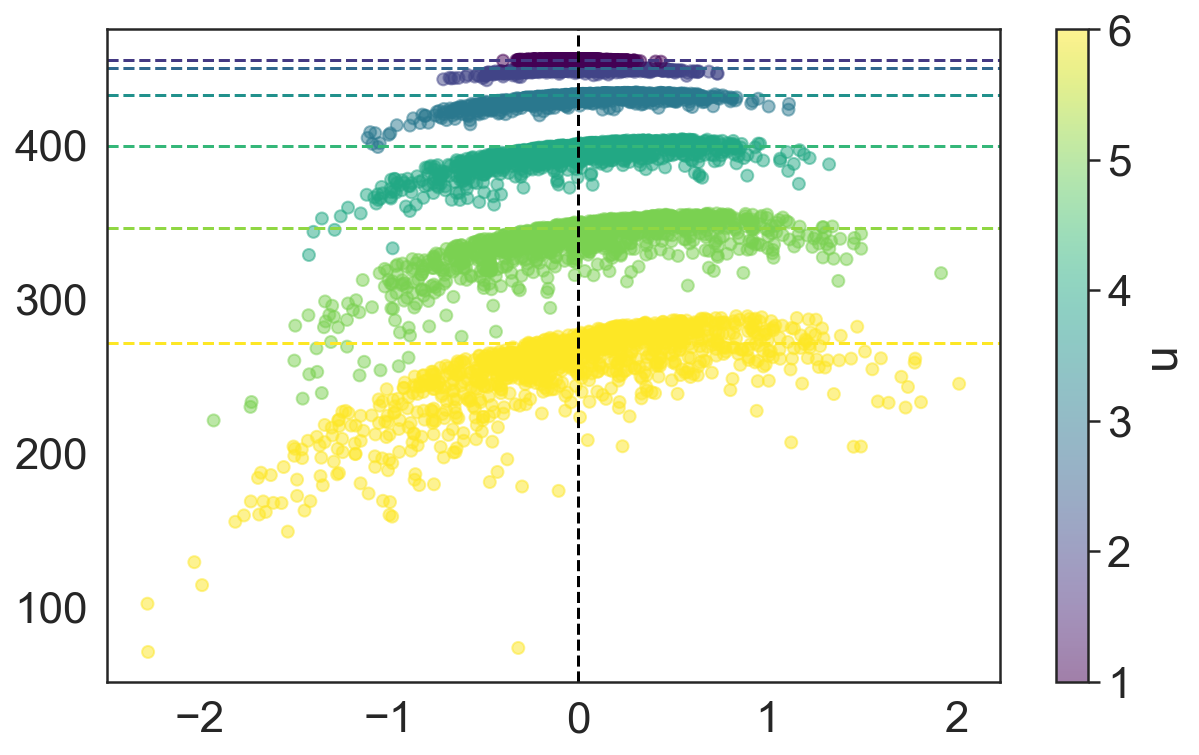

In [176]:
# Calcolare un parametro che rappresenti quanto è ordinato il vettore u: order vector u metric
u_vector_order_param = data_1['u_vector'].apply(lambda x: np.mean(np.diff(np.fromstring(x[1:-1], sep=' '))))

#sorta di media delle variazioni tra gli elementi consecutivi del vettore u_vector, usato come indicatore di quanto il vettore è ordinato.
#se il valore di questa metrica è positivo -> vettore organizzato in ordine crescente, se negativa, vettore organizzato in ordine decrescente

# Plotting
plt.figure(figsize=(10, 6))
sns.set(font_scale=2.0)
sns.set_style("white")
scatter = plt.scatter(u_vector_order_param, performance1_het_dev, alpha=0.5, c=color, cmap='viridis')

# Adding horizontal lines for performance_hom values
unique_mu_values = color.unique()

# Adding colorbar for reference
colorbar = plt.colorbar(scatter)
colorbar.set_label('u')

for mu_value in unique_mu_values:
    mu_performance_hom = data_1[data_1['mu'] == mu_value]['performance_hom'].iloc[0]
    plt.axhline(mu_performance_hom, linestyle='--', label=f'mu={mu_value}', color=colorbar.cmap(mu_value / np.max(unique_mu_values)))

plt.axvline(0, color='black', linestyle='--', label='Zero Line')

#plt.title(f'Rate = {Rate} and #Bias = {Bias}')
#plt.xlabel('descending <-- mean u_vector oder parameter --> ascending')
#plt.ylabel('Performance')
legend_line = mlines.Line2D([], [], color='grey', linestyle='dashed', linewidth=2, label='Performance_hom')
#plt.legend(handles=[legend_line], bbox_to_anchor=(1.15, 1), loc='upper left')
plt.gcf().patch.set_facecolor('white')
#plt.savefig('C:/Users/aless/OneDrive/Desktop/TESI/immagini paper cogsci/immagine1.png', dpi=400, bbox_inches='tight', pad_inches=0.5)
plt.show()

Average u for agents receiving the external task cue:

In [27]:
Bias

1

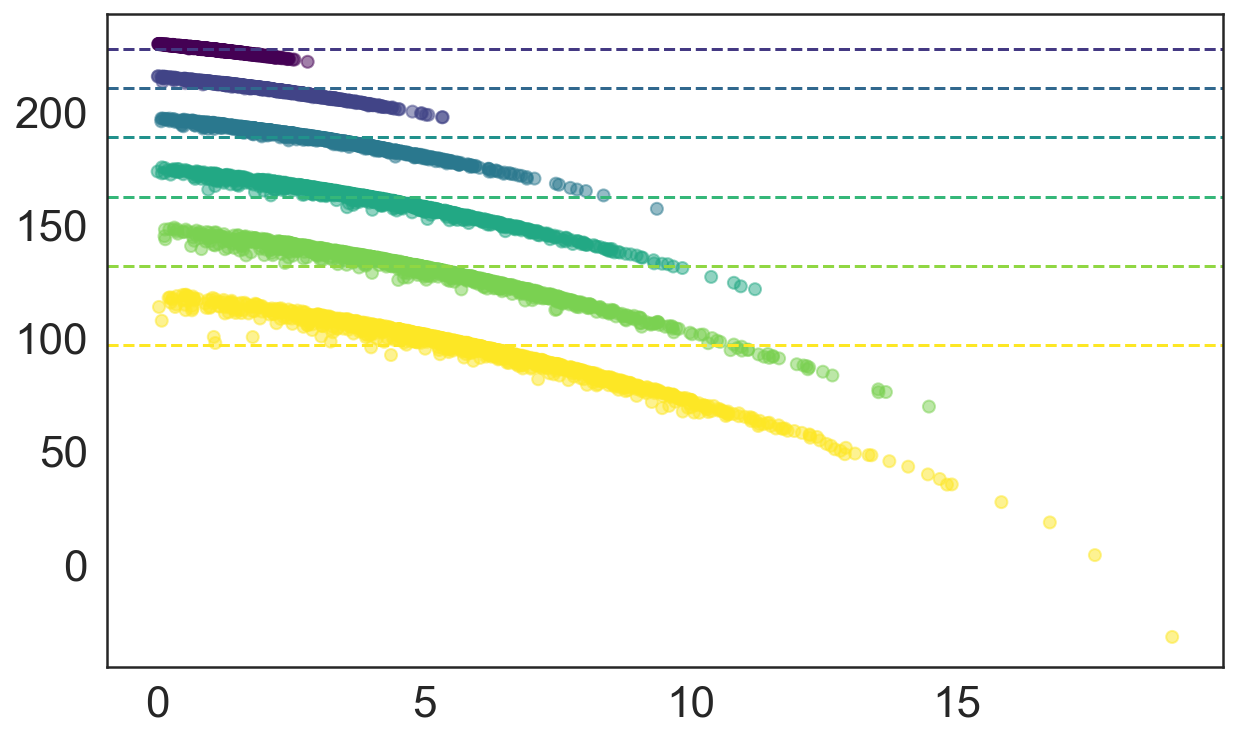

In [28]:
n = Bias * 2

u_vector_order_param = data_1['u_vector'].apply(lambda x: np.mean(np.fromstring(x[1:-1], sep=' ')[:n]))

# Plotting
plt.figure(figsize=(10, 6))
sns.set(font_scale=2.0)
sns.set_style("white")
scatter = plt.scatter(u_vector_order_param, performance1_het_dev, alpha=0.5, c=color, cmap='viridis')

# Adding horizontal lines for performance_hom values
unique_mu_values = color.unique()

# Adding colorbar for reference
#colorbar = plt.colorbar(scatter)
#colorbar.solids.set(alpha=1)
#colorbar.set_label('u')

for mu_value in unique_mu_values:
    mu_performance_hom = data_1[data_1['mu'] == mu_value]['performance_hom'].iloc[0]
    plt.axhline(mu_performance_hom, linestyle='--', label=f'mu={mu_value}', color=colorbar.cmap(mu_value / np.max(unique_mu_values)))

#plt.axvline(0, color='black', linestyle='--', label='Zero Line')

#plt.title(f'Rate = {Rate} and #Bias = {Bias}')
#plt.xlabel('descending <-- mean u_vector oder parameter --> ascending')
#plt.ylabel('Performance')
legend_line = mlines.Line2D([], [], color='grey', linestyle='dashed', linewidth=2, label='Performance_hom')
#plt.legend(handles=[legend_line], bbox_to_anchor=(1.15, 1), loc='upper left')
plt.gcf().patch.set_facecolor('white')
#plt.savefig('C:/Users/aless/OneDrive/Desktop/TESI/immagini paper cogsci/immagine1.png', dpi=400, bbox_inches='tight', pad_inches=0.5)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

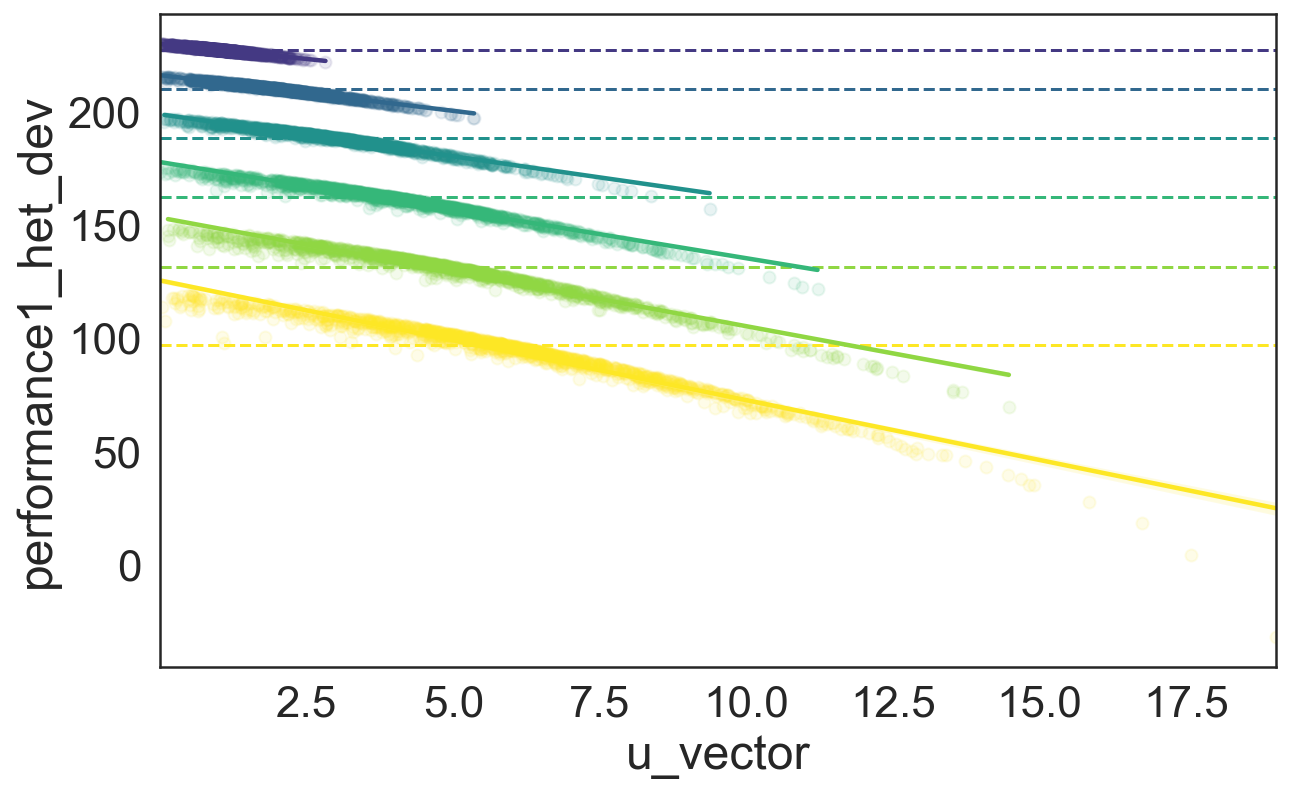

In [29]:
n = Bias *2


u_vector_order_param = data_1['u_vector'].apply(lambda x: np.mean(np.fromstring(x[1:-1], sep=' ')[:n]))
u_vector_order_param_g = data_1['mu']
#print(np.unique(u_vector_order_param_g))

# Plotting
plt.figure(figsize=(10, 6))
sns.set(font_scale=2.0)
sns.set_style("white")
#scatter = plt.scatter(u_vector_order_param, performance1_het_dev, alpha=0.1, c=color, cmap='viridis')

# Adding horizontal lines for performance_hom values
unique_mu_values = color.unique()

# Adding colorbar for reference
#colorbar = plt.colorbar(scatter)
#colorbar.solids.set(alpha=1)
#colorbar.set_label('u')

for mu_value in unique_mu_values:
    #scatter = plt.scatter(u_vector_order_param, performance1_het_dev, alpha=0.1, c=color, cmap='viridis')
    plt.scatter(u_vector_order_param[u_vector_order_param_g == mu_value], 
               performance1_het_dev[u_vector_order_param_g == mu_value], c = colorbar.cmap(mu_value / np.max(unique_mu_values)), alpha = 0.1)
    mu_performance_hom = data_1[data_1['mu'] == mu_value]['performance_hom'].iloc[0]
    plt.axhline(mu_performance_hom, linestyle='--', label=f'mu={mu_value}', color=colorbar.cmap(mu_value / np.max(unique_mu_values)))
    sns.regplot(x=u_vector_order_param[u_vector_order_param_g == mu_value], 
               y= performance1_het_dev[u_vector_order_param_g == mu_value], color = colorbar.cmap(mu_value / np.max(unique_mu_values)), scatter = False, label = None)

#plt.axvline(0, color='black', linestyle='--', label='Zero Line')

#plt.title(f'Rate = {Rate} and #Bias = {Bias}')
#plt.xlabel('descending <-- mean u_vector oder parameter --> ascending')
#plt.ylabel('Performance')
legend_line = mlines.Line2D([], [], color='grey', linestyle='dashed', linewidth=2, label='Performance_hom')
#plt.legend(handles=[legend_line], bbox_to_anchor=(1.15, 1), loc='upper left')
plt.gcf().patch.set_facecolor('white')
#plt.savefig('C:/Users/aless/OneDrive/Desktop/TESI/immagini paper cogsci/immagine20.png', dpi=400, bbox_inches='tight', pad_inches=0.5)
plt.show()

Average g agents receiving - average agents not receiving I:

In [30]:
n = Bias * 2

def custom_metric(x):
    array = np.fromstring(x[1:-1], sep=' ')
    mean_first_n = np.mean(array[:n])
    mean_after_n = np.mean(array[n:])
    return mean_first_n - mean_after_n

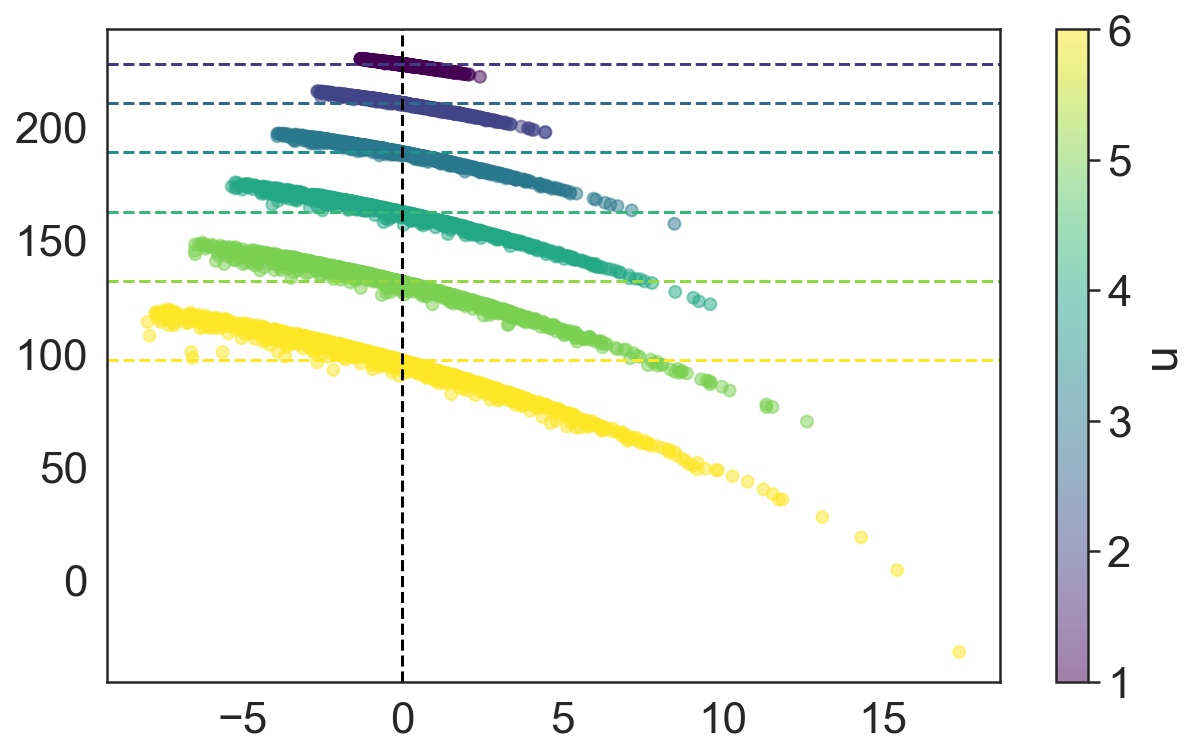

In [31]:
u_vector_order_param = data_1['u_vector'].apply(custom_metric)

# Plotting
plt.figure(figsize=(10, 6))
sns.set(font_scale=2.0)
sns.set_style("white")
scatter = plt.scatter(u_vector_order_param, performance1_het_dev, alpha=0.5, c=color, cmap='viridis')

# Adding horizontal lines for performance_hom values
unique_mu_values = color.unique()

# Adding colorbar for reference
colorbar = plt.colorbar(scatter)
colorbar.set_label('u')

for mu_value in unique_mu_values:
    mu_performance_hom = data_1[data_1['mu'] == mu_value]['performance_hom'].iloc[0]
    plt.axhline(mu_performance_hom, linestyle='--', label=f'mu={mu_value}', color=colorbar.cmap(mu_value / np.max(unique_mu_values)))

plt.axvline(0, color='black', linestyle='--', label='Zero Line')

#plt.title(f'Rate = {Rate} and #Bias = {Bias}')
#plt.xlabel('descending <-- mean u_vector oder parameter --> ascending')
#plt.ylabel('Performance')
legend_line = mlines.Line2D([], [], color='grey', linestyle='dashed', linewidth=2, label='Performance_hom')
#plt.legend(handles=[legend_line], bbox_to_anchor=(1.15, 1), loc='upper left')
plt.gcf().patch.set_facecolor('white')
#plt.savefig('C:/Users/aless/OneDrive/Desktop/TESI/immagini paper cogsci/immagine1.png', dpi=400, bbox_inches='tight', pad_inches=0.5)
plt.show()

Percentile:

In [165]:
n = 2
percentile_value = (Bias / Na) * 100

In [166]:
percentile_value

25.0

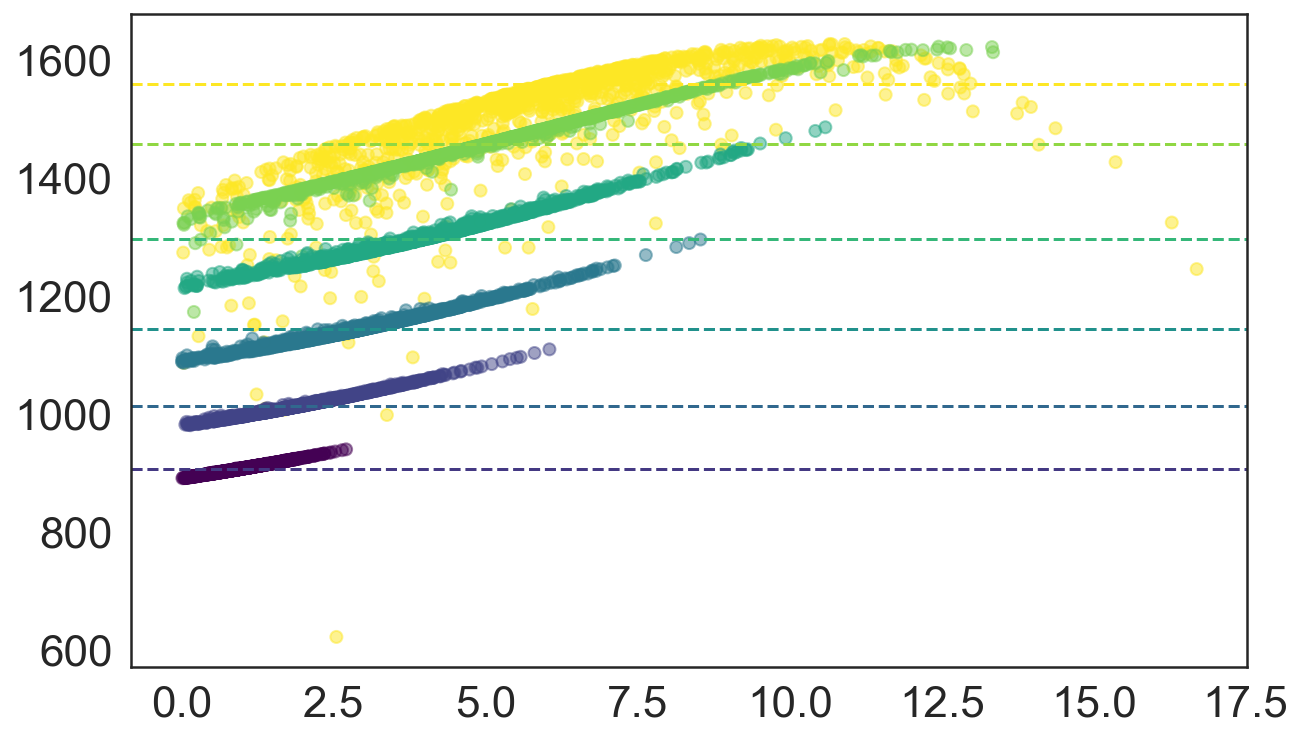

In [167]:
u_vector_order_param = data_1['u_vector'].apply(lambda x: np.percentile(np.fromstring(x[1:-1], sep=' ')[:n], percentile_value))

# Plotting
plt.figure(figsize=(10, 6))
sns.set(font_scale=2.0)
sns.set_style("white")
scatter = plt.scatter(u_vector_order_param, performance1_het_dev, alpha=0.5, c=color, cmap='viridis')

# Adding horizontal lines for performance_hom values
unique_mu_values = color.unique()

# Adding colorbar for reference
#colorbar = plt.colorbar(scatter)
#colorbar.solids.set(alpha=1)
#colorbar.set_label('u')

for mu_value in unique_mu_values:
    mu_performance_hom = data_1[data_1['mu'] == mu_value]['performance_hom'].iloc[0]
    plt.axhline(mu_performance_hom, linestyle='--', label=f'mu={mu_value}', color=colorbar.cmap(mu_value / np.max(unique_mu_values)))

#plt.axvline(0, color='black', linestyle='--', label='Zero Line')

#plt.title(f'Rate = {Rate} and #Bias = {Bias}')
#plt.xlabel('descending <-- mean u_vector oder parameter --> ascending')
#plt.ylabel('Performance')
legend_line = mlines.Line2D([], [], color='grey', linestyle='dashed', linewidth=2, label='Performance_hom')
#plt.legend(handles=[legend_line], bbox_to_anchor=(1.15, 1), loc='upper left')
plt.gcf().patch.set_facecolor('white')
#plt.savefig('C:/Users/aless/OneDrive/Desktop/TESI/immagini paper cogsci/immagine1.png', dpi=400, bbox_inches='tight', pad_inches=0.5)
plt.show()